In [1]:
import torch
import importlib

In [18]:
import copy

covs = torch.load("./calibs/opt-1.3b-0_4-alt_bi-2.pt")
bi_scores = copy.deepcopy(covs["bi_scores"])
del covs
bi_scores


[0.8786431307515659,
 0.02865595771819071,
 0.012344635480324384,
 0.010712580377896158,
 0.007945304756589056,
 0.008145043678833064,
 0.010687641461152614,
 0.013192261723785459,
 0.016911443286873856,
 0.020114605027894722,
 0.02635363474356653,
 0.030209825229025183,
 0.032271321900338296,
 0.03522470501741087,
 0.03730167941275511,
 0.0424363124975172,
 0.0460241475119369,
 0.04737130553497762,
 0.051858460256311495,
 0.04985118483729031,
 0.053380099567878675,
 0.05049064415166116,
 0.05366042848140387,
 0.04291894399760937]

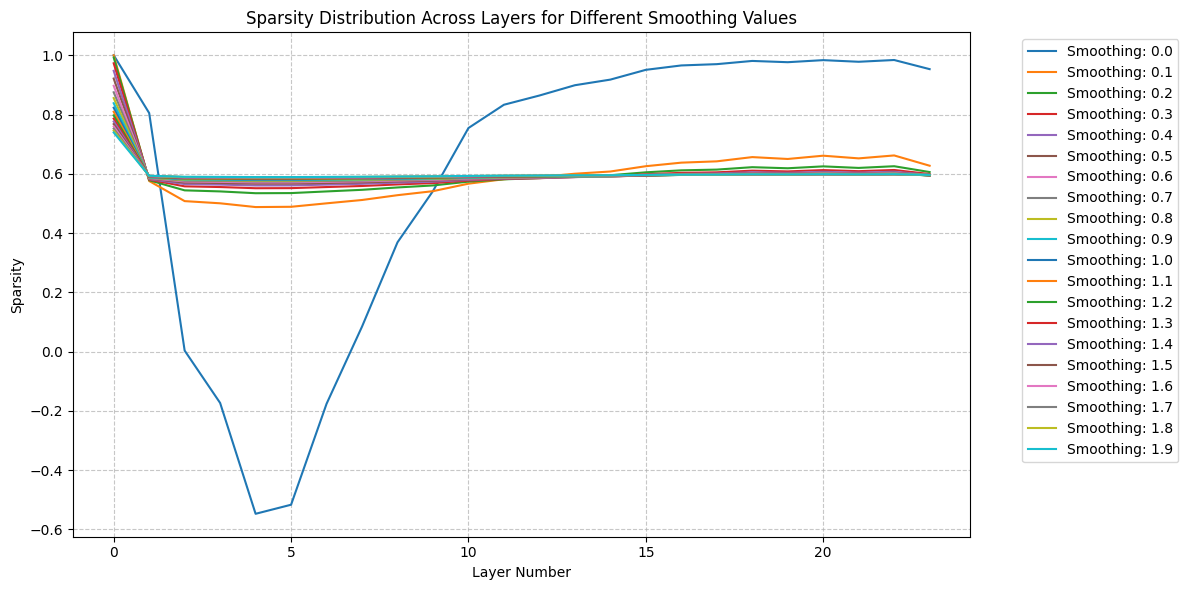

In [19]:
import compression_utils as CU
import matplotlib.pyplot as plt
import numpy as np

importlib.reload(CU)
smoothing = 0.01
inc = 0.1
sparsities = []
while smoothing <= 2:
    sparsity = CU.allocate_global_sparsity(
        bi_scores, compression_ratio=0.4, smoothing=smoothing
    )  # reversing the minus 1
    sparsities.append(sparsity)
    smoothing += inc

# Create figure and axis
plt.figure(figsize=(12, 6))

# Create x-axis values (layer numbers)
layers = np.arange(len(sparsities[0]))

# Plot a line for each smoothing value
for idx, sparsity in enumerate(sparsities):
    smoothing_val = 0.01 + (idx * 0.1)  # Calculate the smoothing value
    plt.plot(layers, sparsity, label=f"Smoothing: {smoothing_val:.1f}")

# Customize the plot
plt.xlabel("Layer Number")
plt.ylabel("Sparsity")
plt.title("Sparsity Distribution Across Layers for Different Smoothing Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

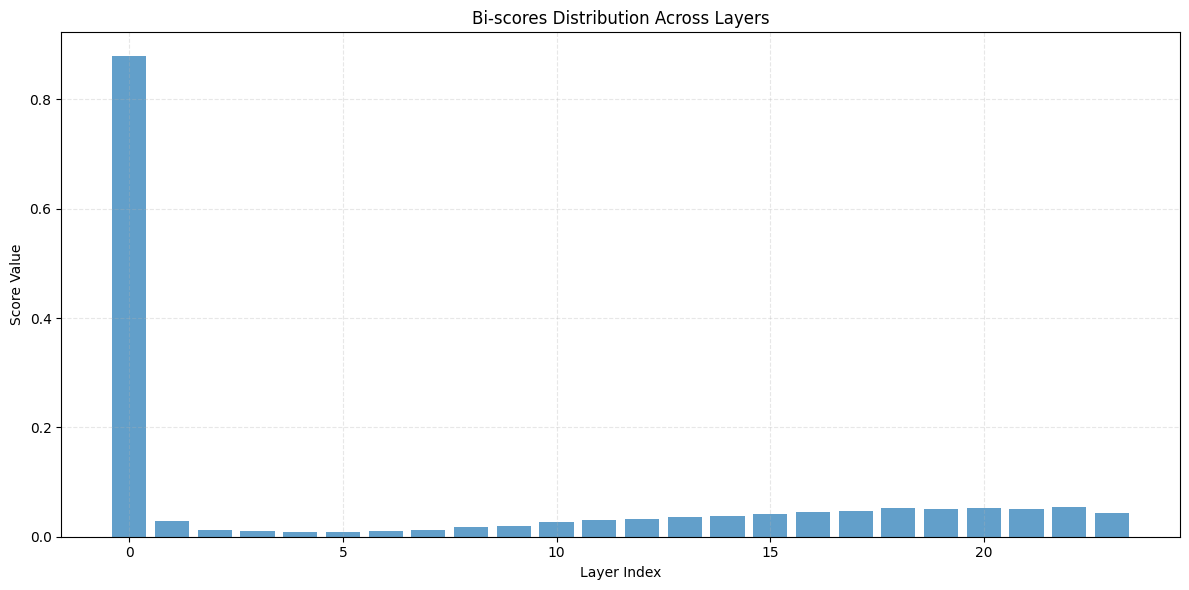

Bi-scores shape: (24,)


In [20]:
# Create a plot for bi_scores
plt.figure(figsize=(12, 6))

# Convert bi_scores to numpy if it's a torch tensor
if torch.is_tensor(bi_scores):
    bi_scores_np = bi_scores.cpu().numpy()
else:
    bi_scores_np = np.array(bi_scores)

# Create x-axis values (layer indices)
layers = np.arange(len(bi_scores_np))

# Create a bar plot of the scores
plt.bar(layers, bi_scores_np, alpha=0.7)

# Customize the plot
plt.xlabel("Layer Index")
plt.ylabel("Score Value")
plt.title("Bi-scores Distribution Across Layers")

# Add grid
plt.grid(True, linestyle="--", alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print shape information
print(f"Bi-scores shape: {bi_scores_np.shape}")

In [ ]:
A = torch.randn(100).view(-1, 100)
A

tensor([[-2.1039,  1.0565, -0.4512, -0.5970,  0.7431, -0.4708,  0.5455, -0.2852,
         -0.6893, -2.0894],
        [ 0.6208, -0.1674, -0.8276,  0.4459,  1.9828,  0.4934,  1.0746,  0.4302,
         -2.6769, -0.2175],
        [-0.9848,  1.4977, -0.8430, -0.1494,  0.6234, -1.1454,  0.0722,  2.0772,
          0.6484, -0.8330],
        [ 0.9522, -0.6255,  0.2648,  0.0808, -0.8106,  1.7828,  0.1954, -0.5005,
          1.1013, -1.1770],
        [-0.0185, -1.1259, -1.0098, -0.7748, -0.5420,  0.2359, -0.9413,  2.3660,
          1.1448,  1.1921]])

In [43]:
torch.topk(A, k=3, largest=True, dim=0)

torch.return_types.topk(
values=tensor([[ 0.9522,  1.4977,  0.2648,  0.4459,  1.9828,  1.7828,  1.0746,  2.3660,
          1.1448,  1.1921],
        [ 0.6208,  1.0565, -0.4512,  0.0808,  0.7431,  0.4934,  0.5455,  2.0772,
          1.1013, -0.2175],
        [-0.0185, -0.1674, -0.8276, -0.1494,  0.6234,  0.2359,  0.1954,  0.4302,
          0.6484, -0.8330]]),
indices=tensor([[3, 2, 3, 1, 1, 3, 1, 4, 4, 4],
        [1, 0, 0, 3, 0, 1, 0, 2, 3, 1],
        [4, 1, 1, 2, 2, 4, 3, 1, 2, 2]]))